### Customer loyalty- Monthly_Cohort_Retension 

The Cohort analysis one of the most important aspect for the growth of a business because of the specificity of the information it provides. Analysis of these cohorts shows the behaviour of customers based on when they started using the company’s products or services. The time can be monthly or quarterly or even daily. In the notebook, we are working on Monthly_Cohort_Retension.
We have downloaded dataset from https://www.kaggle.com/datasets/mathchi/online-retail-ii-data-set-from-ml-repository?resource=download. We have performed the following steps to get rentension from the data-

1. Data cleaning
two. Data Preparation
3. Calculating Cohort-Index for each customer
4. Returning number of unique customers in each month
5. Calculating the percentage of returning customers 
6. plotting heatmap by using seaborn and matplotlib library
7. Calculating the average quantity of product purchesed by per cohort and plotting it's heatmap. 



In [3]:
import pandas as pd 
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.duplicated().sum()

5268

In [7]:
df['CustomerID'].duplicated().sum()

537536

In [10]:
df= df.dropna(subset=['CustomerID'])

In [11]:
df.duplicated().sum()

5225

In [14]:
df = df.drop_duplicates()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0


In [16]:
import datetime as dt

df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x: dt.datetime(x.year,x.month,1))


In [85]:
df['InvoiceMonth']

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-01
541905   2011-12-01
541906   2011-12-01
541907   2011-12-01
541908   2011-12-01
Name: InvoiceMonth, Length: 401604, dtype: datetime64[ns]

In [86]:
 group =df.groupby('CustomerID')['InvoiceMonth']

In [87]:
df['CohortMonth'] = group.transform('min')

In [88]:
#create new columns that contains date differences in month and year
import numpy as np

df['diff_months'] = ((df['InvoiceMonth'] - df['CohortMonth']) / np.timedelta64(1, 'M')).astype(int)
df['diff_years'] = ((df['InvoiceMonth'] - df['CohortMonth']) / np.timedelta64(1, 'Y')).astype(int)

In [89]:
# CohortIndex is occurance of customer from  first time to his last purchase
df['CohortIndex'] = df['diff_years'] * 12 + df['diff_months'] + 1

In [90]:
df['CohortIndex']

0         1
1         1
2         1
3         1
4         1
         ..
541904    5
541905    5
541906    5
541907    5
541908    5
Name: CohortIndex, Length: 401604, dtype: int32

In [91]:
#Count monthly active customers from each cohort
group = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = group['CustomerID'].apply(pd.Series.nunique)

In [92]:
cohort_data 

CohortMonth  CohortIndex
2010-12-01   1              948
             2              362
             3              482
             4              341
             5              376
                           ... 
2011-10-01   1              352
             2               93
             3               46
2011-11-01   1              321
2011-12-01   1               41
Name: CustomerID, Length: 80, dtype: int64

In [93]:
cohort_data = cohort_data.reset_index()

In [94]:
cohort_data

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,482
3,2010-12-01,4,341
4,2010-12-01,5,376
...,...,...,...
75,2011-10-01,1,352
76,2011-10-01,2,93
77,2011-10-01,3,46
78,2011-11-01,1,321


In [95]:
# Returning number of unique customers in each month

cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')


In [96]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2010-12-01,948.0,362.0,482.0,341.0,376.0,360.0,336.0,336.0,NaN,510.0,NaN,538.0
2011-01-01,421.0,171.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN
2011-04-01,299.0,NaN,111.0,NaN,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN
2011-06-01,235.0,NaN,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
cohort_size 

CohortMonth
2010-12-01    948.0
2011-01-01    421.0
2011-02-01    380.0
2011-03-01    440.0
2011-04-01    299.0
2011-05-01    279.0
2011-06-01    235.0
2011-07-01    191.0
2011-08-01    167.0
2011-09-01    298.0
2011-10-01    352.0
2011-11-01    321.0
2011-12-01     41.0
Name: 1, dtype: float64

In [98]:
# Retention table

#selecting all the rows and first column
cohort_size = cohort_counts.iloc[:,0]

#culculating the percentage of returning customer and axis=0 is to divide along the row axis 

retention = cohort_counts.divide(cohort_size,axis=0) 
retention.round(2) * 100 


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2010-12-01,100.0,38.2,50.8,36.0,39.7,38.0,35.4,35.4,NaN,53.8,NaN,56.8
2011-01-01,100.0,40.6,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN
2011-04-01,100.0,NaN,37.1,NaN,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN
2011-06-01,100.0,NaN,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


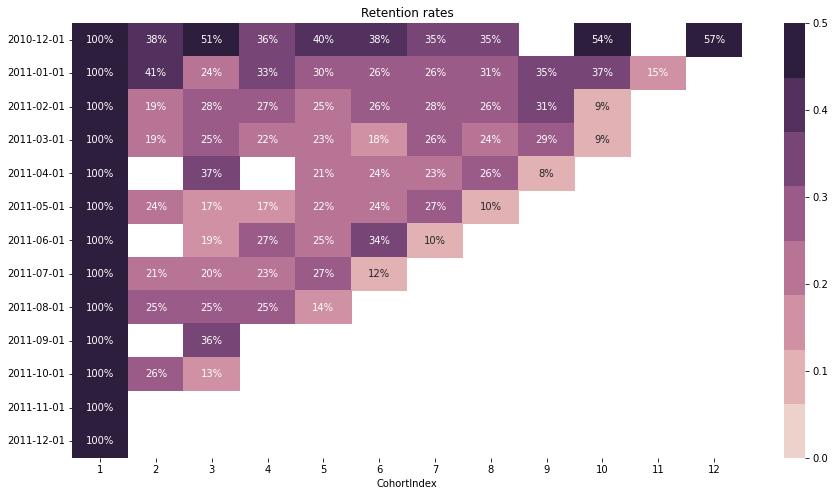

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

#Build the heatmap
retention.index = retention.index.date
plt.figure(figsize=(15, 8))
plt.title('Retention rates of the customer')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap=sns.cubehelix_palette(8))
plt.show()

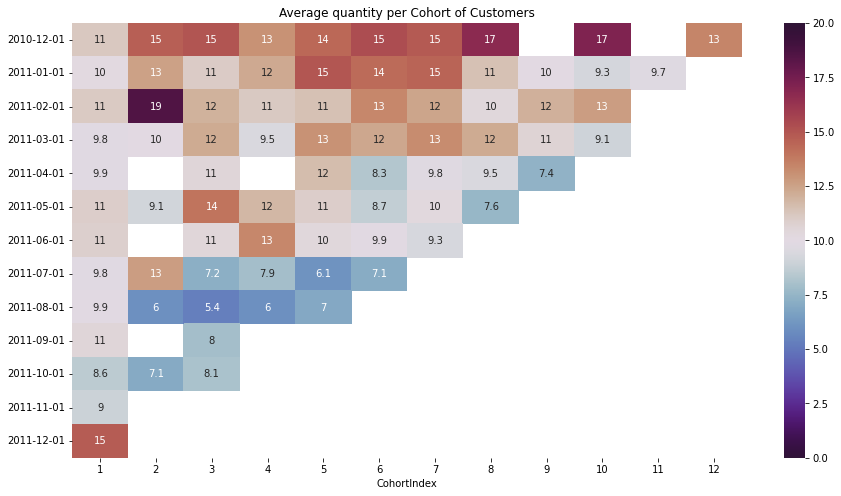

In [112]:
#Calculating the average quantity per cohort
group = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = group['Quantity'].mean()
cohort_data = cohort_data.reset_index()
avg_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')

#Build the heatmap 
plt.figure(figsize=(15, 8))
plt.title('Average quantity per Cohort of Customers')
avg_quantity.index = avg_quantity.index.date
sns.heatmap(data=avg_quantity,annot = True,vmin = 0.0,vmax =20,cmap="twilight_shifted")
plt.show()